In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib import cm
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow import keras
import datetime

2025-06-16 15:40:47.782694: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-16 15:40:47.795164: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-16 15:40:47.810130: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8463] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-16 15:40:47.815786: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-16 15:40:47.825508: I tensorflow/core/platform/cpu_feature_guar

## (0): Required Functions:

### (0.1): SymPy Lambdify

In [2]:
def sympy_lambdify_expression(
        sympy_variables: list[sp.Symbol] | tuple[sp.Symbol, ...],
        sympy_expression: sp.Expr):
    """
    ## Description:
    Here, we assume you have defined (i) a collection of SymPy Symbols and
    (ii) a SymPy expression composed of those symbols. Now, we simply turn
    that SymPy function of those symbols into a Python function through
    SymPy's lambdify function.

    ## Arguments:
    1. `sympy_variables` (sp.Symbol)
    2. `sympy_expression` (int)
    """
    return sp.lambdify(sympy_variables, sympy_expression, 'numpy')

## (1.1): Define SymPy symbols:

In [3]:
independent_variable_symbols = sp.symbols("x y")

### (1.1.1): Verify the symbols worked:

In [4]:
independent_variable_symbols[0]

x

In [5]:
independent_variable_symbols[1]

y

## (1.2): Make an ansatz for $X(x)$ and $Y(y)$

In [6]:
# X(x):
X_function_of_x = independent_variable_symbols[0]**2 + sp.exp(independent_variable_symbols[0])

# Y(y):
Y_function_of_y = 1. / (0.05**2 + independent_variable_symbols[1]**2)

# f(x, q):
f_function_of_x_and_y = (independent_variable_symbols[0]**2 + sp.exp(independent_variable_symbols[0])) / (0.05**2 + independent_variable_symbols[1]**2)

### (1.2.1): Verify the functions worked:

In [7]:
X_function_of_x

x**2 + exp(x)

In [8]:
Y_function_of_y

1.0/(y**2 + 0.0025)

In [9]:
f_function_of_x_and_y

(x**2 + exp(x))/(y**2 + 0.0025)

## (1.3): Lambdify the symbolic functions:

In [10]:
lambdified_X_function_of_x = sympy_lambdify_expression(independent_variable_symbols[0], X_function_of_x)
lambdified_Y_function_of_y = sympy_lambdify_expression(independent_variable_symbols[1], Y_function_of_y)
lambdified_f_function_of_x_and_y = sympy_lambdify_expression(independent_variable_symbols, f_function_of_x_and_y)

### (1.3.1): Testing N(x):

In [11]:
lambdified_X_function_of_x(0)

1.0

### (1.3.2): Testing F(q)

In [12]:
lambdified_Y_function_of_y(0)

400.0

### (1.3.3): Testing $f(x, y)$:

In [13]:
lambdified_f_function_of_x_and_y(0., 0.)

400.0

## (1.4): Visualizing the Functions:

### (1.4.1): Matplotlib rcParams:

For clarity and a somewhat professional appearance.

In [14]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amsmath}"
})
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 2.5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 2.5
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.right'] = True

### (1.4.2): Generating some Random $x$ and $p$ values:

In [15]:
x_values, y_values = np.random.uniform(low = 0., high = 1., size = 1000), np.random.uniform(low = 0., high = 1., size = 1000)

### (1.4.3): Visualizing the "input space":

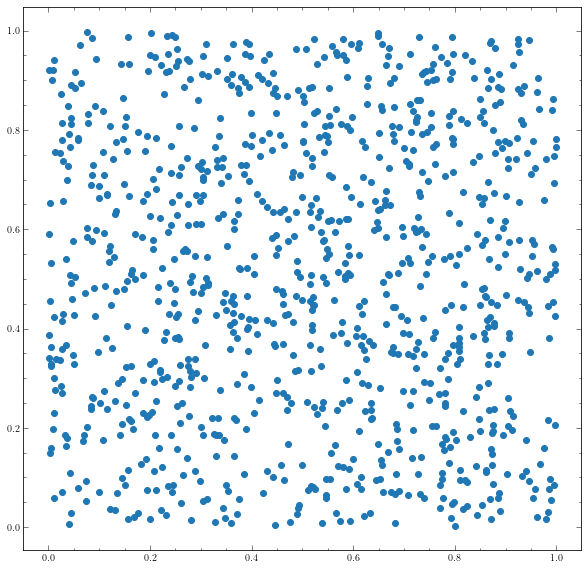

In [16]:
input_space_figure = plt.figure(figsize = (10, 10))
input_space_axis = input_space_figure.add_subplot(1, 1, 1)
input_space_axis.scatter(x_values, y_values)

### (1.4.3): Visualizing $X(x)$ vs. $x$:

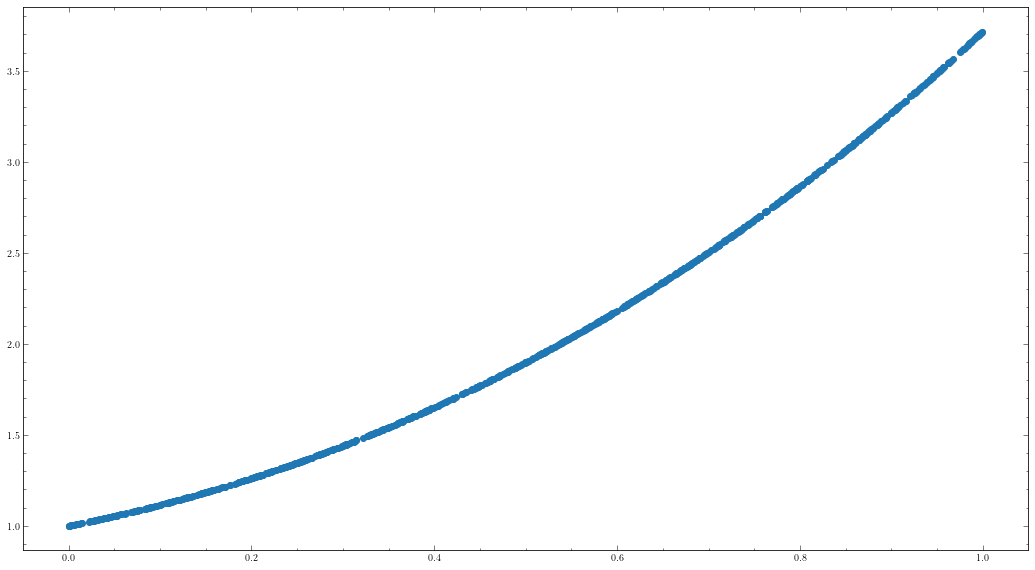

In [17]:
n_vs_x_figure = plt.figure(figsize = (18, 10))
n_vs_x_axis = n_vs_x_figure.add_subplot(1, 1, 1)
n_vs_x_axis.scatter(x_values, lambdified_X_function_of_x(x_values))

### (1.4.2): Visualizing $F(q)$ vs. $q$:

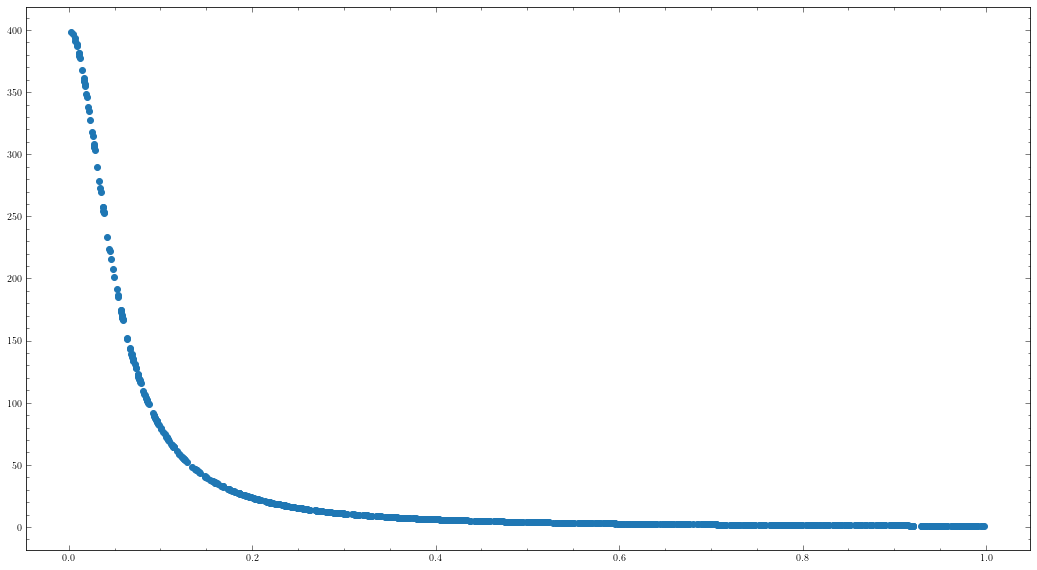

In [18]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1)
f_vs_p_axis.scatter(y_values, lambdified_Y_function_of_y(y_values))

### (1.4.3): Visualizing Product $X(x)Y(y)$:

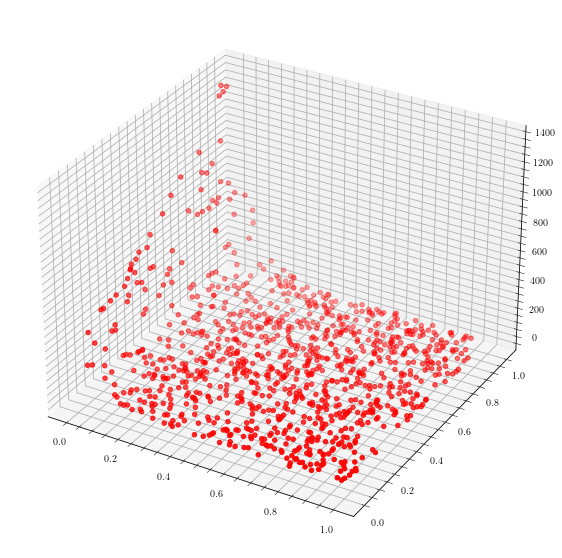

In [19]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1, projection = "3d")
f_vs_p_axis.scatter(x_values, y_values, lambdified_Y_function_of_y(x_values) * lambdified_X_function_of_x(y_values), color = 'red')

### (1.4.4): Visualizing Function $f(x, y)$:

What we should see here is the *exact same* as what we got above. There should be absolutely *no difference.*

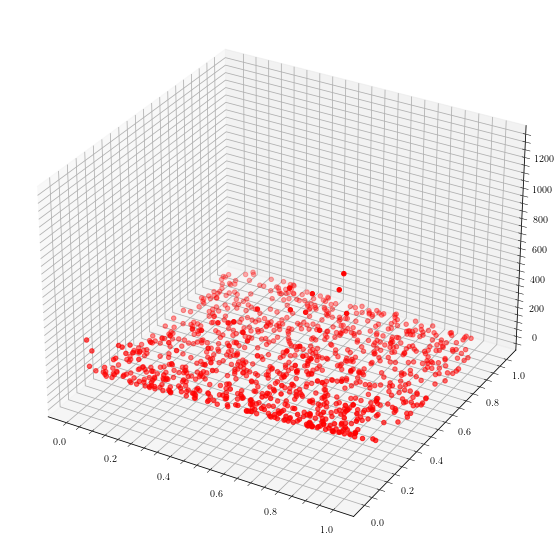

In [20]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1, projection = "3d")
f_vs_p_axis.scatter(x_values, y_values, lambdified_f_function_of_x_and_y(x_values, y_values), color = 'red')

### (1.4.4): Showing values of $f(x, y) - N(x) Y(y) \approx 0$ for all elements:

We can also figure out what is going on by computing the element-wise difference:

In [21]:
lambdified_f_function_of_x_and_y(x_values, y_values) - lambdified_Y_function_of_y(y_values) * lambdified_X_function_of_x(x_values)

array([ 1.77635684e-15,  3.55271368e-15,  0.00000000e+00,  5.68434189e-14,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.44089210e-16,
        0.00000000e+00,  0.00000000e+00,  7.10542736e-15, -8.88178420e-16,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.42108547e-14,  0.00000000e+00,
        0.00000000e+00, -2.22044605e-16,  0.00000000e+00, -8.88178420e-16,
        0.00000000e+00,  0.00000000e+00,  1.77635684e-15, -2.22044605e-16,
        0.00000000e+00,  8.88178420e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -7.10542736e-15,  1.77635684e-15,
       -8.88178420e-16,  0.00000000e+00,  8.88178420e-16,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -4.44089210e-16,  0.00000000e+00,
        1.77635684e-15,  2.22044605e-16,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

## (2): Building the DNN for $f(x, y) = X(x) Y(y)$

### (2.1): DNN Hyperparameter Settings:

In [22]:
SETTING_VERBOSE = True
SETTING_DEBUG = True
LEARNING_RATE = 0.005
BATCH_SIZE_LOCAL_FITS = 32
BATCH_SIZE_GLOBAL_FITS = 10
EARLY_STOP_PATIENCE = 20
LEARNING_RATE_PATIENCE = 20
MODIFY_LR_FACTOR = 0.9
SETTING_DNN_TRAINING_VERBOSE = 1

EPOCHS = 1000

### (2.2): DNN Architecture:

In [23]:
dnn_network_input = Input(
    shape = (2, ),
    name = 'input_layer')

# (3): Define the Model Architecture:
x1 = Dense(32, activation = "relu")(dnn_network_input)
x2 = Dense(16, activation = "relu")(x1)
x3 = Dense(16, activation = "relu")(x2)
x4 = Dense(16, activation = "relu")(x3)
dnn_network_output = Dense(1, activation = "linear", name = 'output_y_value')(x4)

# (4): Define the model as as Keras Model:
tensorflow_network = Model(
    inputs = dnn_network_input,
    outputs = dnn_network_output,
    name = "basic_function_predictor")

tensorflow_network.compile(
    optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [
        tf.keras.metrics.MeanSquaredError()
        ])

tensorflow_network.summary()

2025-06-16 15:40:50.412792: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-06-16 15:40:50.412811: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: t-node
2025-06-16 15:40:50.412815: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: t-node
2025-06-16 15:40:50.412866: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 550.107.2
2025-06-16 15:40:50.412876: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: 550.107.2
2025-06-16 15:40:50.412878: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:249] kernel version seems to match DSO: 550.107.2


Model: "basic_function_predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_y_value (Dense)          │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,185 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

## (3): DNN Data Preprocessing:

### (3.1): Data Index Splitting:

In [24]:
split_percentage = 0.2

xy_pairs = np.stack(
    (y_values, x_values), 
    axis = 1)


number_of_samples = xy_pairs.shape[0]

indices = np.arange(number_of_samples)

np.random.shuffle(indices)

### (3.2): Data Splitting:

We need to split the data into (i) training data, (ii) validation data, and (iii) testing pieces.

In [25]:
split_testing = int(number_of_samples * 0.2)
split_validation = int(number_of_samples * 0.1)

validation_indices = indices[split_testing:split_testing + split_validation]
validation_x_data = xy_pairs[validation_indices]
validation_y_data = lambdified_f_function_of_x_and_y(y_values, x_values)[validation_indices]

training_indices = indices[split_testing + split_validation:]
training_x_data = xy_pairs[training_indices]
training_y_data = lambdified_f_function_of_x_and_y(y_values, x_values)[training_indices]


testing_indices = indices[:split_testing]
testing_x_data = xy_pairs[testing_indices]
testing_y_data = lambdified_f_function_of_x_and_y(y_values, x_values)[testing_indices]

## (4): DNN Training and Evaluation:

### (4.1): DNN Training:

In [26]:
start_time_in_milliseconds = datetime.datetime.now().replace(microsecond = 0)

history_of_training = tensorflow_network.fit(
    training_x_data,
    training_y_data,
    validation_data = (testing_x_data, testing_y_data),
    epochs = EPOCHS,
    batch_size = BATCH_SIZE_LOCAL_FITS,
    verbose = SETTING_DNN_TRAINING_VERBOSE)

end_time_in_milliseconds = datetime.datetime.now().replace(microsecond = 0)
print(f"> Replica job finished in {end_time_in_milliseconds - start_time_in_milliseconds}ms.")

Epoch 1/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 32552.0078 - mean_squared_error: 32552.0078 - val_loss: 31110.5156 - val_mean_squared_error: 31110.5156
Epoch 2/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24851.0078 - mean_squared_error: 24851.0078 - val_loss: 29163.9180 - val_mean_squared_error: 29163.9180
Epoch 3/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24738.6191 - mean_squared_error: 24738.6191 - val_loss: 27181.2617 - val_mean_squared_error: 27181.2617
Epoch 4/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18191.7676 - mean_squared_error: 18191.7676 - val_loss: 25262.4746 - val_mean_squared_error: 25262.4746
Epoch 5/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18467.6426 - mean_squared_error: 18467.6426 - val_loss: 21774.6172 - val_mean_squared_error: 21774.6172
Epoch 6/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18350.8008 - mean_squared_error: 18350.8008 - val_loss: 16782.4688 - val_mean_squared_error: 16782.4688
Epoch 7/1000
22/

### (4.2): DNN Evaluation:

### (4.2.1): Extract Evaluation Data:

In [27]:
training_loss_data = history_of_training.history['loss']
validation_loss_data = history_of_training.history['val_loss']

#### (4.2.2): Perform Evaluation:

In [28]:
validaton_loss, validation_mae = tensorflow_network.evaluate(testing_x_data, testing_y_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 3.5730 - mean_squared_error: 3.5730


#### (4.2.3): Visualize Evaluation:

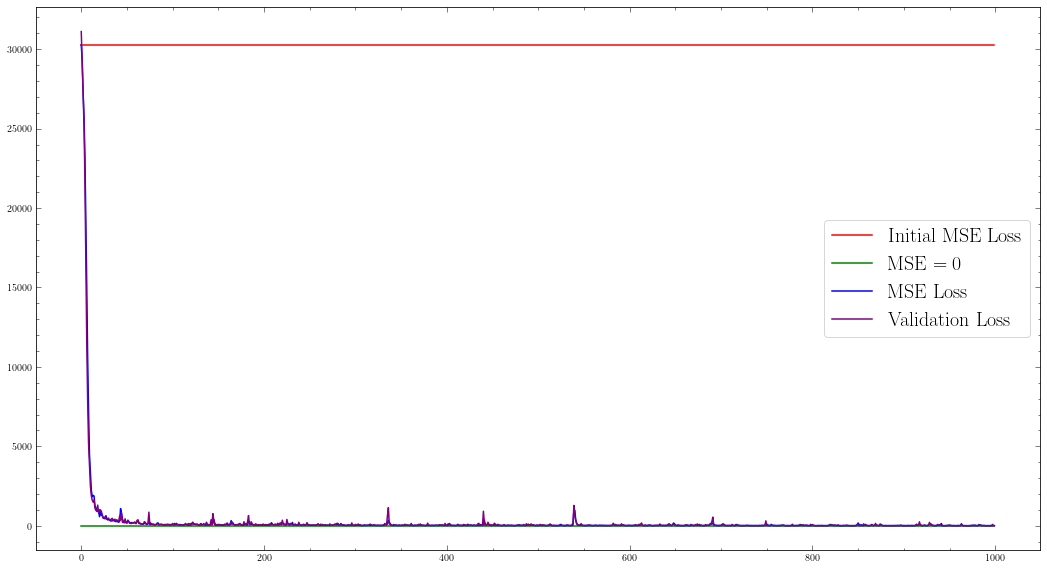

In [29]:
evaluation_figure = plt.figure(figsize = (18, 10))
evaluation_axis = evaluation_figure.add_subplot(1, 1, 1)
evaluation_axis.plot(np.arange(0, EPOCHS, 1), np.array([np.max(training_loss_data) for number in training_loss_data]), color = "red", label = "Initial MSE Loss")
evaluation_axis.plot(np.arange(0, EPOCHS, 1), np.zeros(shape = EPOCHS), color = "green", label = r"MSE $= 0$")
evaluation_axis.plot(np.arange(0, EPOCHS, 1), training_loss_data, color = "blue", label = "MSE Loss")
evaluation_axis.plot(np.arange(0, EPOCHS, 1), validation_loss_data, color = "purple", label = "Validation Loss")
evaluation_axis.legend(fontsize = 20)

## (5): DNN Predictions:

### (5.1): Numerical Predictions:

In [30]:
model_predictions = np.array(tensorflow_network.predict(training_x_data))

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


### (5.2): Visualizing Predictions:

#### (5.2.1): Scatter Plot:

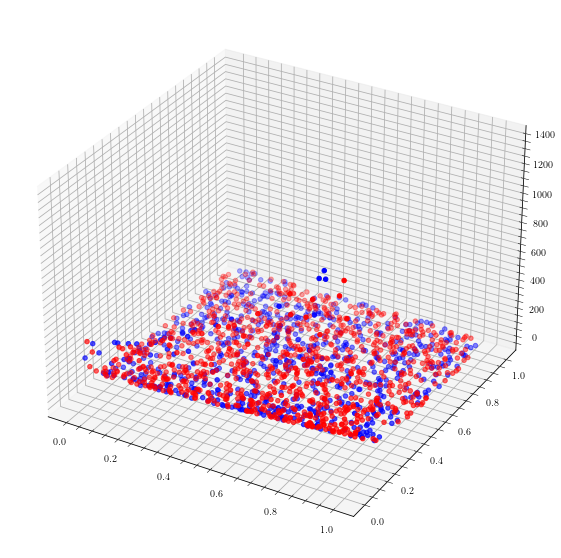

In [31]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1, projection = "3d")
f_vs_p_axis.scatter(x_values, y_values, lambdified_f_function_of_x_and_y(x_values, y_values), color = 'red')
f_vs_p_axis.scatter(training_x_data[:,0], training_x_data[:,1], model_predictions, color = 'blue')

#### (5.2.2): Surface Plot:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step


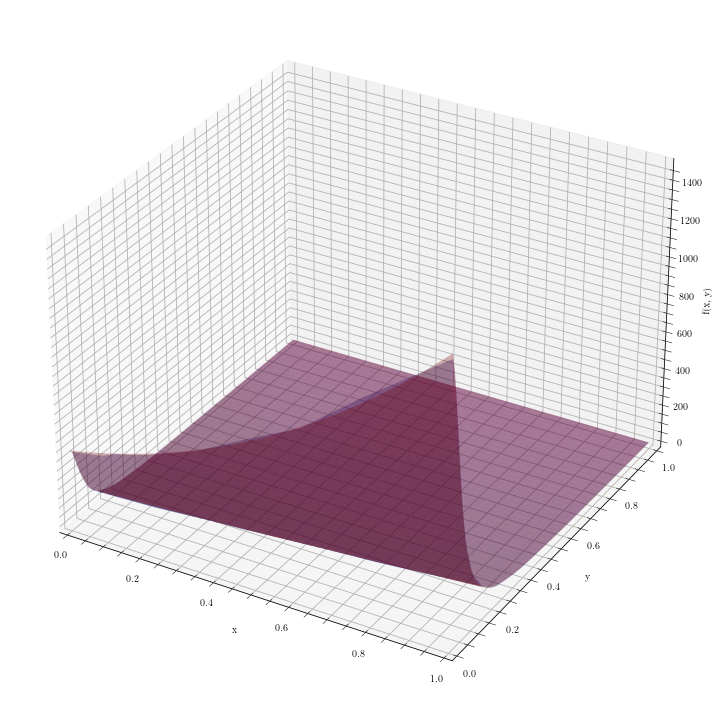

In [32]:
x_min, x_max = x_values.min(), x_values.max()
y_min, y_max = y_values.min(), y_values.max()

x_grid, y_grid = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100))

grid_points = np.c_[
    x_grid.ravel(), 
    y_grid.ravel()]

z_true = lambdified_f_function_of_x_and_y(grid_points[:, 0], grid_points[:, 1]).reshape(x_grid.shape)
z_model = tensorflow_network.predict(grid_points).reshape(x_grid.shape)

surface_plot_figure = plt.figure(figsize = (18, 10))
surface_plot_axis = surface_plot_figure.add_subplot(1, 1, 1, projection = '3d')

surface_plot_axis.plot_surface(x_grid, y_grid, z_true, color = 'red', alpha = 0.3, label = 'True Function')
surface_plot_axis.plot_surface(x_grid, y_grid, z_model, color = 'blue', alpha = 0.3, label = 'Model Prediction')

surface_plot_axis.set_xlabel('x')
surface_plot_axis.set_ylabel('y')
surface_plot_axis.set_zlabel('f(x, y)')

surface_plot_axis.set_xlim(0, 1)
surface_plot_axis.set_ylim(0, 1)

surface_plot_axis.view_init(elev = 30, azim = -60) 

plt.tight_layout()
plt.show()

## (6): Try to Fix $X(x)$ Only with $Y(y)$ Known:

### (6.1): DNN Architecture for Only $X(x)$:

We need to understand that this DNN is different from the previous one in its input; it only takes in $x$, not and $x$ and $y$. Remember that we're trying to represent $X(x)$ with and $X^{\text{DNN}}(x)$.

In [33]:
x_input = tf.keras.Input(shape=(1,))
x1 = Dense(64, activation = 'relu')(x_input)
x2 = Dense(64, activation = 'relu')(x1)
x_output = Dense(1)(x2)

tensorflow_model_for_x_function = tf.keras.Model(
    inputs = x_input, 
    outputs = x_output)

def custom_mse_loss(y_true, y_pred):
    """
    This loss will get .call()'ed with `y_true` and `y_pred`.
    """
    return tf.reduce_mean(tf.square(y_true - y_pred * y_values))

tensorflow_model_for_x_function.compile(
    optimizer = keras.optimizers.Adam(learning_rate = LEARNING_RATE),
      loss = custom_mse_loss,
      metrics = [
        tf.keras.metrics.MeanSquaredError()
        ])

tensorflow_model_for_x_function.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

### (6.2): DNN Hyperparameters:

The DNN hyperparameters for $X^{\text{DNN}}(x)$ don't need to change much. So, let's just skip this for now.

### (6.3): Data Preprocessing

#### (6.3.1): Data Index Splitting:

In [34]:
split_percentage = 0.2

number_of_samples = x_values.shape[0]
print(f"> Obtained {number_of_samples} number of samples!")

indices = np.arange(number_of_samples)

np.random.shuffle(indices)

> Obtained 1000 number of samples!


#### (6.3.2): Data Splitting:

We need to split the data into (i) training data, (ii) validation data, and (iii) testing pieces.

In [35]:
split_testing = int(number_of_samples * 0.2)
split_validation = int(number_of_samples * 0.1)

validation_indices = indices[split_testing:split_testing + split_validation]
validation_x_data = x_values[validation_indices]
validation_y_data = lambdified_f_function_of_x_and_y(x_values, y_values)[validation_indices]

training_indices = indices[split_testing + split_validation:]
training_x_data = x_values[training_indices]
training_y_data = lambdified_f_function_of_x_and_y(x_values, y_values)[training_indices]


testing_indices = indices[:split_testing]
testing_x_data = x_values[testing_indices]
testing_y_data = lambdified_f_function_of_x_and_y(x_values, y_values)[testing_indices]

### (6.4): DNN Training and Evaluation:

#### (6.4.1): DNN Training:

In [36]:
start_time_in_milliseconds = datetime.datetime.now().replace(microsecond = 0)

history_of_training = tensorflow_model_for_x_function.fit(
    x_values, 
    lambdified_f_function_of_x_and_y(x_values, y_values),
    validation_data = (validation_x_data, validation_y_data),
    epochs = EPOCHS,
    batch_size = BATCH_SIZE_LOCAL_FITS,
    verbose = SETTING_DNN_TRAINING_VERBOSE)

end_time_in_milliseconds = datetime.datetime.now().replace(microsecond = 0)
print(f"> Replica job finished in {end_time_in_milliseconds - start_time_in_milliseconds}ms.")


Epoch 1/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 27000.3828 - mean_squared_error: 26926.9492 - val_loss: 21224.6875 - val_mean_squared_error: 20685.8301
Epoch 2/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17558.1953 - mean_squared_error: 16723.9824 - val_loss: 19075.0840 - val_mean_squared_error: 18199.6426
Epoch 3/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20578.5137 - mean_squared_error: 20595.4863 - val_loss: 19001.4570 - val_mean_squared_error: 19876.3184
Epoch 4/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24123.6953 - mean_squared_error: 24495.0156 - val_loss: 18927.2090 - val_mean_squared_error: 18836.7598
Epoch 5/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26708.6523 - mean_squared_error: 26611.3496 - val_loss: 18909.7773 - val_mean_squared_error: 19065.6309
Epoch 6/1000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22865.6758 - mean_squared_error: 22936.3945 - val_loss: 18898.3379 - val_mean_squared_error: 19112.6387
Epoch 7/1000
32/

#### (6.4.2): DNN Evaluation:

##### (6.4.2.1): Extract Evaluation Data:

In [37]:
training_loss_data = history_of_training.history['loss']
validation_loss_data = history_of_training.history['val_loss']

##### (6.4.2.2): Perform Evaluation:

In [38]:
validaton_loss = tensorflow_model_for_x_function.evaluate(testing_x_data, testing_y_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 22598.0586 - mean_squared_error: 22171.9902


##### (6.4.2.3): Visualize Evaluation:

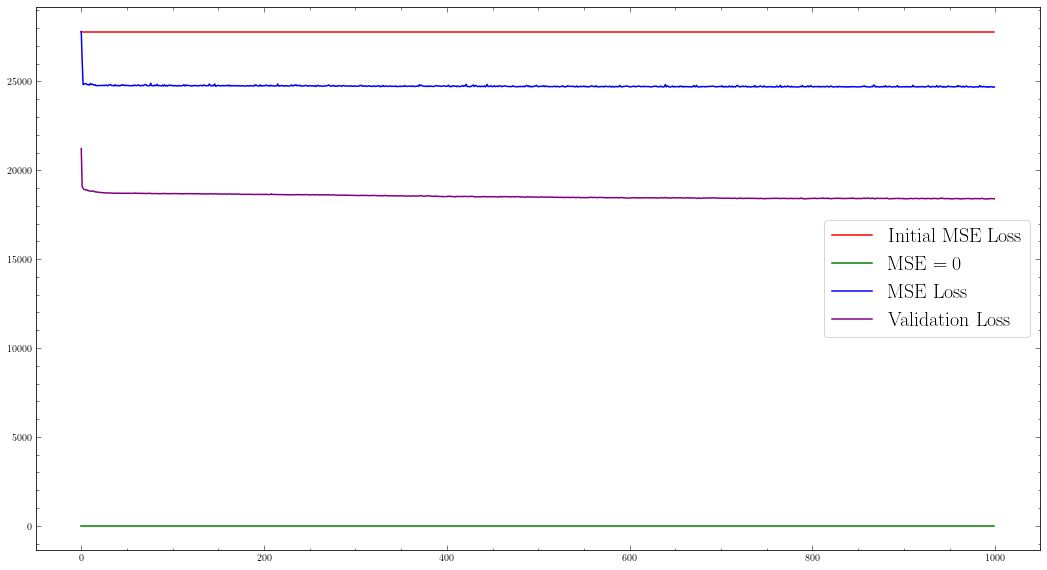

In [39]:
evaluation_figure = plt.figure(figsize = (18, 10))
evaluation_axis = evaluation_figure.add_subplot(1, 1, 1)
evaluation_axis.plot(np.arange(0, EPOCHS, 1), np.array([np.max(training_loss_data) for number in training_loss_data]), color = "red", label = "Initial MSE Loss")
evaluation_axis.plot(np.arange(0, EPOCHS, 1), np.zeros(shape = EPOCHS), color = "green", label = r"MSE $= 0$")
evaluation_axis.plot(np.arange(0, EPOCHS, 1), training_loss_data, color = "blue", label = "MSE Loss")
evaluation_axis.plot(np.arange(0, EPOCHS, 1), validation_loss_data, color = "purple", label = "Validation Loss")
evaluation_axis.legend(fontsize = 20)

### (6.5): DNN Predictions:

#### (6.5.1): Numerical Predictions:

In [47]:
model_predictions = np.array(tensorflow_model_for_x_function.predict(x_values))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step


#### (6.5.2): Visualizing Predictions:

##### (6.5.2.1): Scatterplot for just $N(x)$ vs. $x$:

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step


ValueError: x and y must be the same size

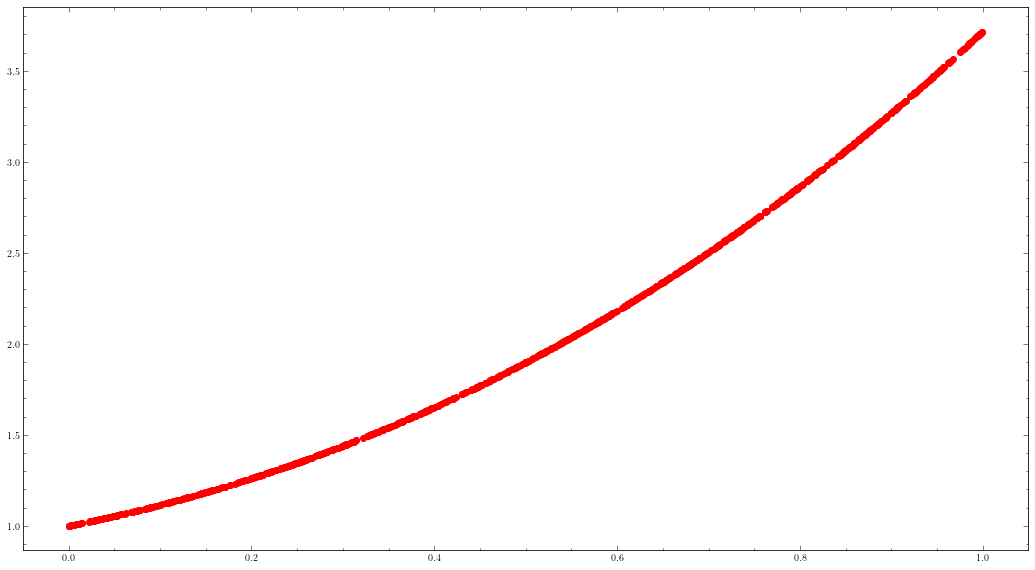

In [49]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1)
f_vs_p_axis.scatter(x_values, lambdified_X_function_of_x(x_values), color = 'red', label = rf"True Function: ${sp.latex(X_function_of_x)}$")
f_vs_p_axis.scatter(x_values, np.array(tensorflow_model_for_x_function.predict(x_values)) * lambdified_Y_function_of_y(y_values), color = 'blue', label = "DNN Predictions")
plt.legend(fontsize = 20, shadow = True)

In [44]:
training_x_data.shape

(700,)

In [46]:
(model_predictions * lambdified_Y_function_of_y(y_values)).shape

(1000, 1000)

##### (6.5.2.1): Scatterplot for $X^{\text{DNN}}(x) Y(y)$:

In [ ]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1, projection = "3d")
f_vs_p_axis.scatter(x_values, y_values, lambdified_X_function_of_x(x_values), color = 'red', label = rf"True Function: ${sp.latex(X_function_of_x)}$")
f_vs_p_axis.scatter(training_x_data, y_values[training_indices], model_predictions, color = 'blue', label = "DNN Predictions")
plt.legend(fontsize = 20, shadow = True)

# f_vs_p_figure = plt.figure(figsize = (18, 10))
# f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1, projection = "3d")
# f_vs_p_axis.scatter(x_values, y_values, lambdified_f_function_of_x_and_y(x_values, y_values), color = 'red')
# f_vs_p_axis.scatter(training_x_data[:,0], training_x_data[:,1], model_predictions, color = 'blue')

##### (6.5.2.3): Surface Plot for just $N(x)$ vs. $x$:

In [ ]:
f_vs_p_figure = plt.figure(figsize = (18, 10))
f_vs_p_axis = f_vs_p_figure.add_subplot(1, 1, 1)
f_vs_p_axis.plot(x_values, lambdified_X_function_of_x(x_values), color = 'red', label = rf"True Function: ${sp.latex(X_function_of_x)}$")
f_vs_p_axis.plot(training_x_data, model_predictions, color = 'blue', label = "DNN Predictions")
plt.legend(fontsize = 20, shadow = True)

##### (6.5.2.4): Surface Plot for $X^{\text{DNN}}(x) Y(y)$:

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step


AttributeError: 'Poly3DCollection' object has no attribute '_facecolors2d'

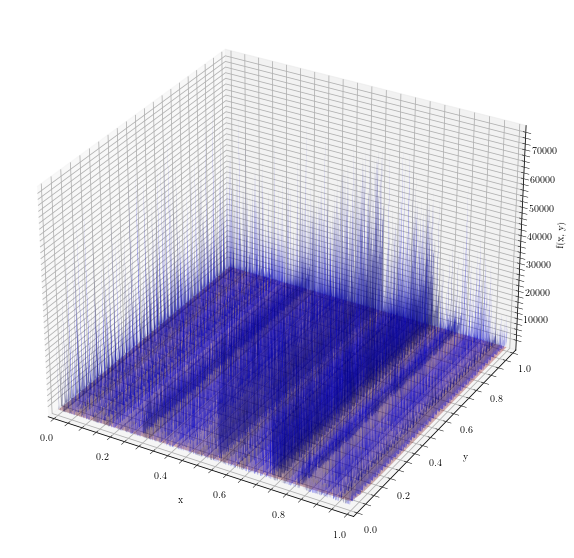

In [42]:
x_min, x_max = x_values.min(), x_values.max()
y_min, y_max = y_values.min(), y_values.max()

x_grid, y_grid = np.meshgrid(
    np.linspace(x_min, x_max, 1000),
    np.linspace(y_min, y_max, 1000))

grid_points = np.c_[
    x_grid.ravel(), 
    y_grid.ravel()]

z_true = lambdified_f_function_of_x_and_y(grid_points[:, 0], grid_points[:, 1]).reshape(x_grid.shape)
z_model = (tensorflow_model_for_x_function.predict(x_values) * lambdified_Y_function_of_y(y_values)).reshape(x_grid.shape)

surface_plot_figure = plt.figure(figsize = (18, 10))
surface_plot_axis = surface_plot_figure.add_subplot(1, 1, 1, projection = '3d')

surface_plot_axis.plot_surface(x_grid, y_grid, z_true, color = 'red', alpha = 0.3, label = 'True Function')
surface_plot_axis.plot_surface(x_grid, y_grid, z_model, color = 'blue', alpha = 0.3, label = 'Model Prediction')

surface_plot_axis.set_xlabel('x')
surface_plot_axis.set_ylabel('y')
surface_plot_axis.set_zlabel('f(x, y)')

surface_plot_axis.set_xlim(0, 1)
surface_plot_axis.set_ylim(0, 1)

surface_plot_axis.view_init(elev = 30, azim = -60) 

plt.legend(fontsize = 20, shadow = True)
plt.tight_layout()
plt.show()